In [2]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/data/NHANES_age_prediction.csv')
dataset.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
dataset.shape

(2278, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
dataset.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [7]:
dataset['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

In [8]:
dataset['age_group'].value_counts()

,count
age_group,
Adult,1914
Senior,364


In [9]:
dataset['age_group'].replace(['Senior', 'Adult'],[0, 1], inplace=True)
dataset.head(10)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,1,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,1,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,1,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,1,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,1,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,73581.0,1,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08
6,73587.0,1,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11
7,73596.0,1,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93
8,73607.0,0,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47
9,73610.0,1,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24


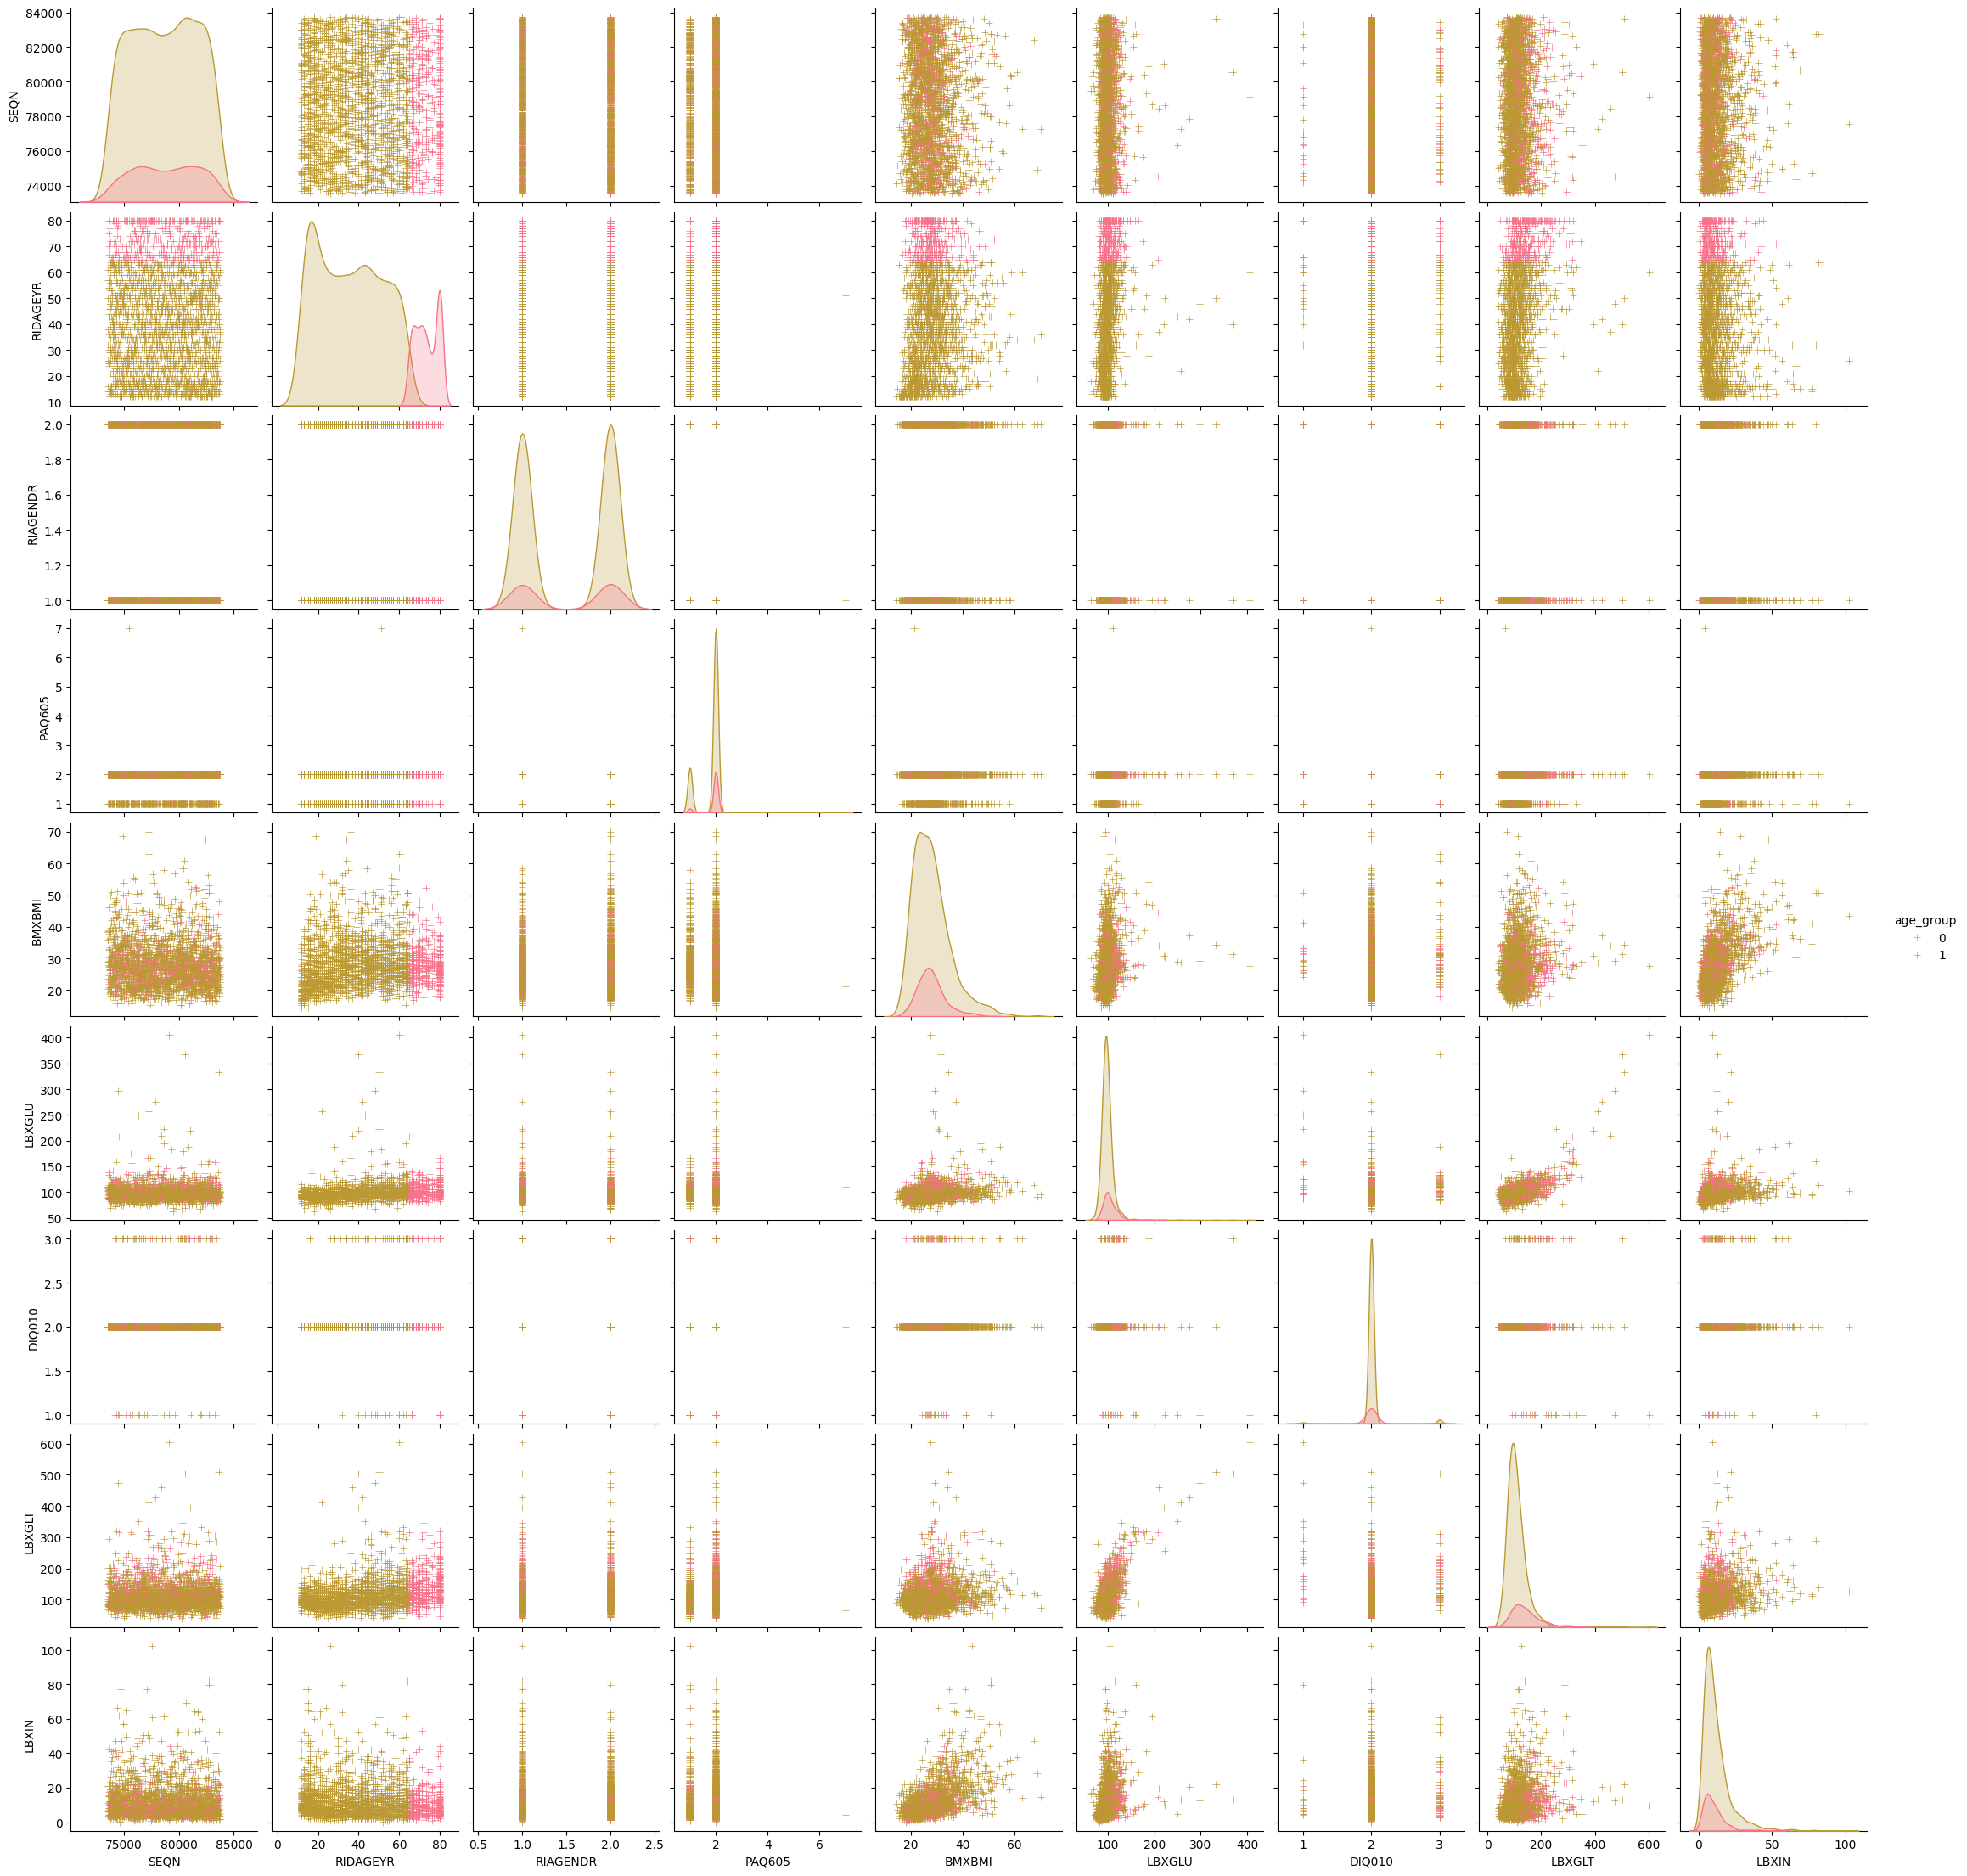

In [18]:
sns.pairplot(dataset, hue='age_group', markers='+')
plt.show()

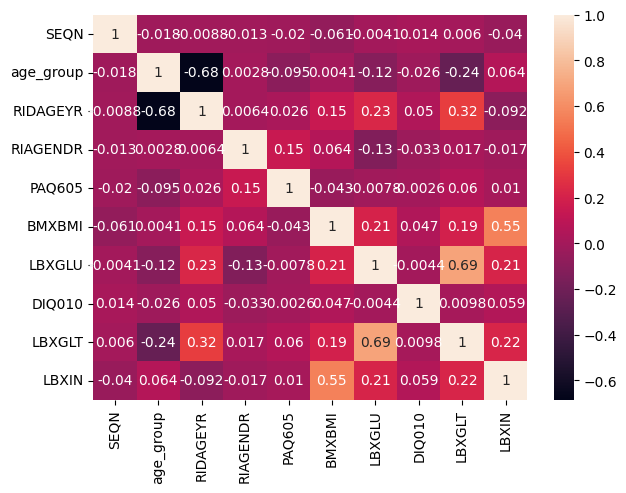

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

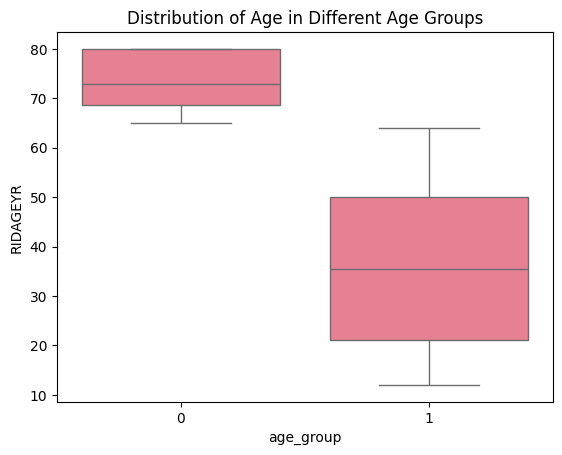

In [13]:
sns.boxplot(x='age_group', y='RIDAGEYR', data=dataset)
plt.title('Distribution of Age in Different Age Groups')
plt.show()

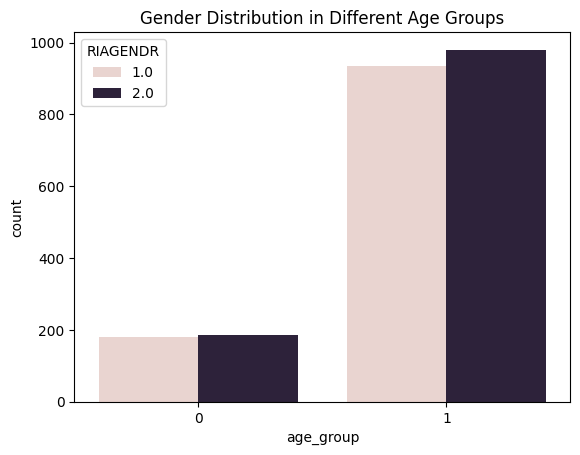

In [14]:
sns.countplot(x='age_group', hue='RIAGENDR', data=dataset)
plt.title('Gender Distribution in Different Age Groups')
plt.show()

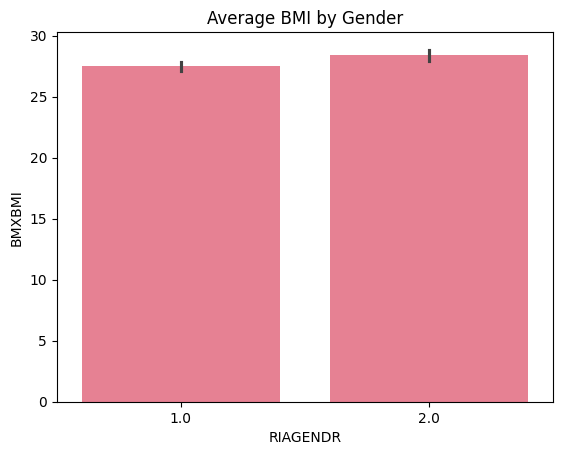

In [15]:
sns.barplot(x='RIAGENDR', y='BMXBMI', data=dataset)
plt.title('Average BMI by Gender')
plt.show()

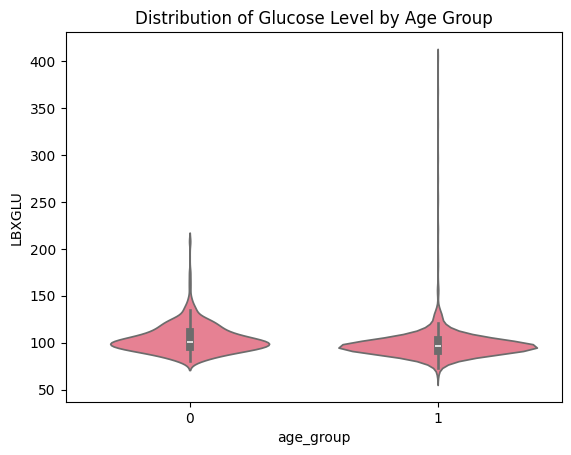

In [16]:
sns.violinplot(x='age_group', y='LBXGLU', data=dataset)
plt.title('Distribution of Glucose Level by Age Group')
plt.show()

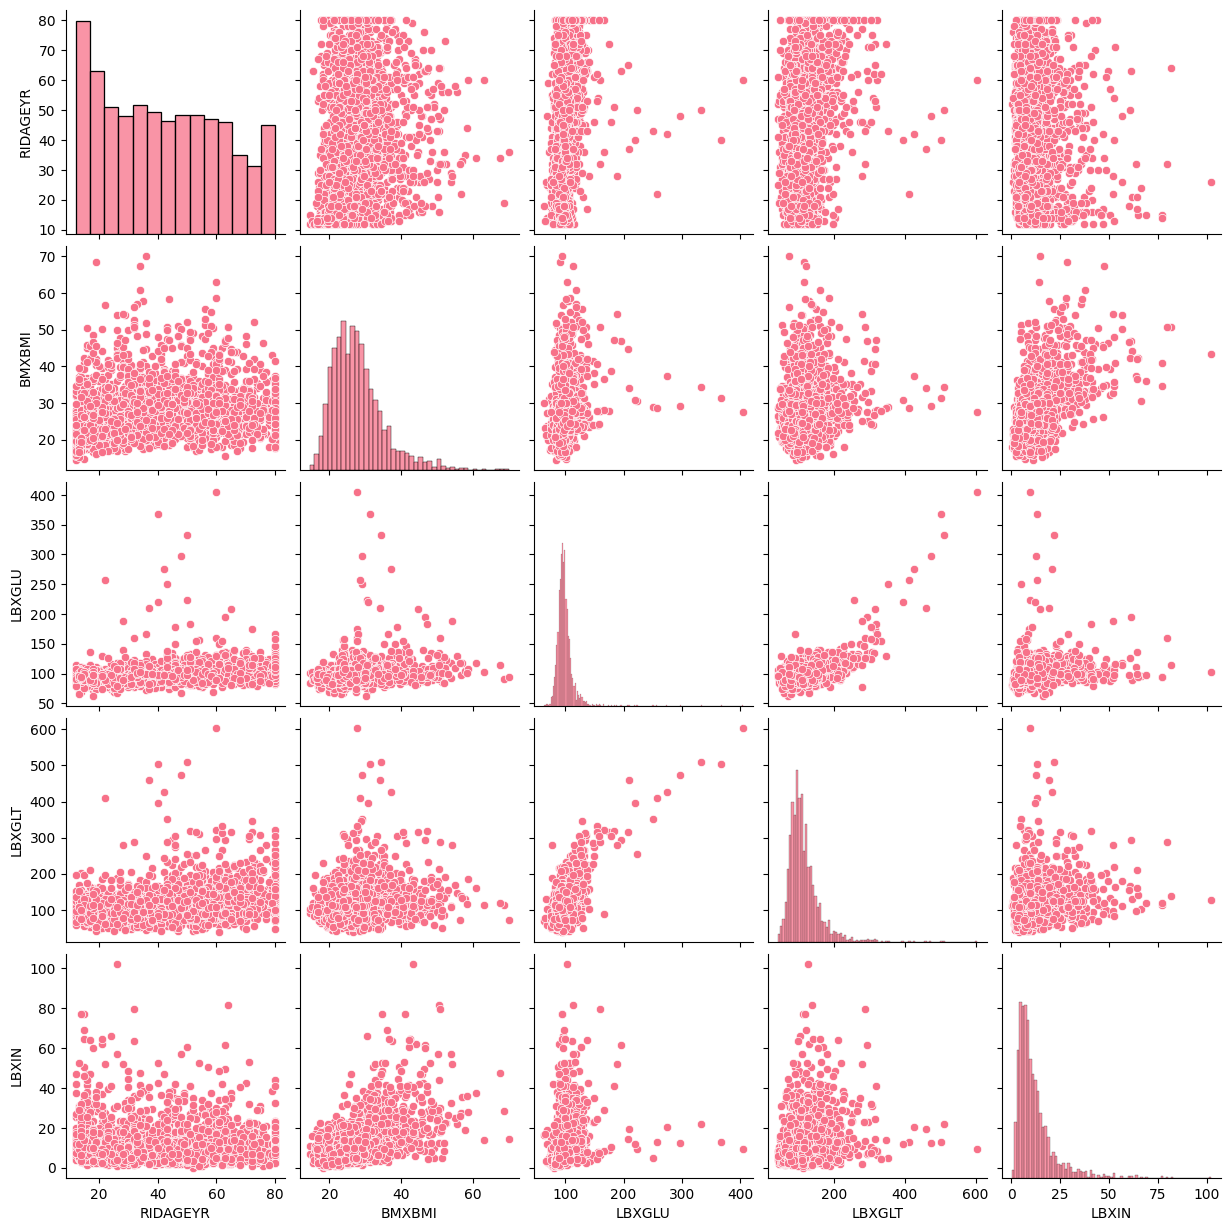

In [17]:
sns.pairplot(dataset[['RIDAGEYR', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']])
plt.show()
